In [941]:
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [942]:
original_df = pd.read_csv(
    '/home/mwawaka/PycharmProjects/pythonProject1/CAT/data/NSE_data_all_stocks_2022_jan_to_may.csv')

df = original_df.copy()
df.rename(columns={'12m Low': '12mth Low', '12m High': '12mth High', 'Day Price': 'Close Price',
                   'Previous': 'Previous Close Price', 'Change': 'Change Close Price'}, inplace=True)


In [943]:
#convert the date column from type object to type Date
df['Date'] = pd.DatetimeIndex(df['Date'])
df.set_index('Date', inplace=True)

df['Close Price'] = pd.to_numeric(df['Close Price'], errors="coerce")

# Filling the null values with estimate values based on existing data 
df['Close Price'].interpolate(inplace=True)

df['Close Price'].isna().sum()

0

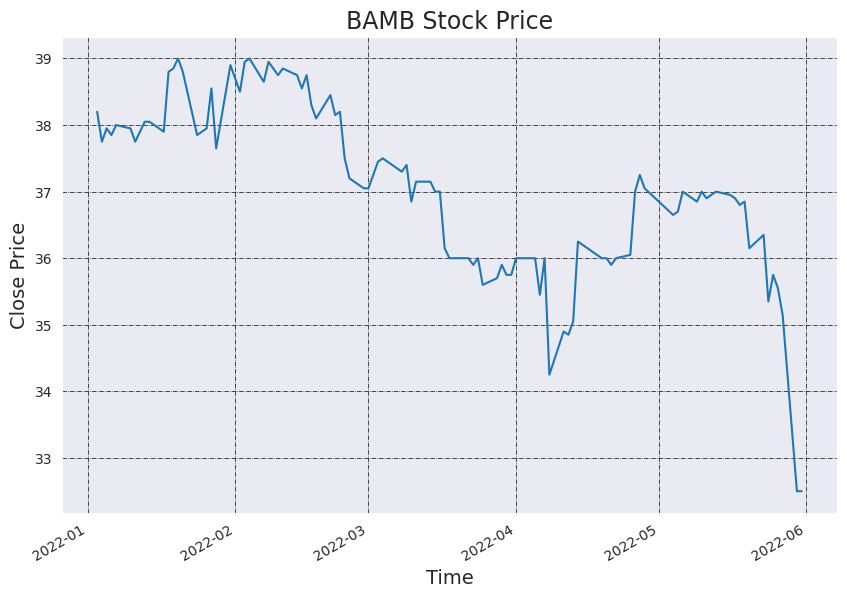

In [944]:
# Time series for Stocks for different companies
random_value = int(random.uniform(0, 10))
companies = ['ABSA', 'EQTY', 'BRIT', 'NCBA', 'EGAD', 'BAMB', 'CRWN', 'KPLC-P4', 'TPSE', 'DTK','UCHM']
company_code = companies[random_value]
company_df = df.loc[df['Code'] == company_code]

# Plotting the data
company_df['Close Price'].plot(figsize=(10, 7))
plt.title(company_code + " Stock Price", fontsize=17)
plt.ylabel('Close Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [945]:
company_df

,Code,Name,12mth Low,12mth High,Day Low,Day High,Close Price,Previous Close Price,Change Close Price,Change%,Volume,Adjusted Price
Date,,,,,,,,,,,,
2022-01-03,BAMB,Bamburi Cement Ltd,33,42,38,38.45,38.20,38,0.2,0.53%,"6,200",-
2022-01-04,BAMB,Bamburi Cement Ltd,33,42,37.5,38,37.75,38.2,-0.45,1.18%,"19,700",-
2022-01-05,BAMB,Bamburi Cement Ltd,33,42,37,38.1,37.95,37.75,0.2,0.53%,"22,500",-
2022-01-06,BAMB,Bamburi Cement Ltd,33,42,37.5,38,37.85,37.95,-0.1,0.26%,"44,600",-
2022-01-07,BAMB,Bamburi Cement Ltd,33,42,37.95,38,38.00,37.85,0.15,0.40%,"1,300",-
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-25,BAMB,Bamburi Cement Ltd,33,40,35.5,36.85,35.75,35.35,0.4,1.13%,"48,200",-
2022-05-26,BAMB,Bamburi Cement Ltd,33,40,35.1,36.55,35.55,35.75,-0.2,0.56%,"43,200",-
2022-05-27,BAMB,Bamburi Cement Ltd,33,40,34.3,35.5,35.15,35.55,-0.4,1.13%,"11,000",-


In [946]:
#Using Close price and Exponential Moving Averages
new_df = company_df[['Close Price']]
ema_df = new_df.copy()
# Adding technical indicators
import pandas_ta as ta

# Exponential Moving Averages
ema_df['EMA'] = ta.ema(ema_df['Close Price'], length=5)
ema_df

,Close Price,EMA
Date,,
2022-01-03,38.20,NaN
2022-01-04,37.75,NaN
2022-01-05,37.95,NaN
2022-01-06,37.85,NaN
2022-01-07,38.00,37.950000
...,...,...
2022-05-25,35.75,36.011484
2022-05-26,35.55,35.857656
2022-05-27,35.15,35.621771


# Exponential Moving Average

- The average is calculated over a 5 day period
- the first 4 entries in our data will have a NaN value since there were not proceeding values from which the EMA could be calculated.
- Will drop the rows with NaN values

In [947]:
# Dropping the null values
ema_df.dropna(subset=['EMA'], inplace=True)


- First, let’s take a quick look at a plot of our data now to get an idea of how the EMA value tracks with the adjusted closing price.
- We can see here the EMA tracks nicely.

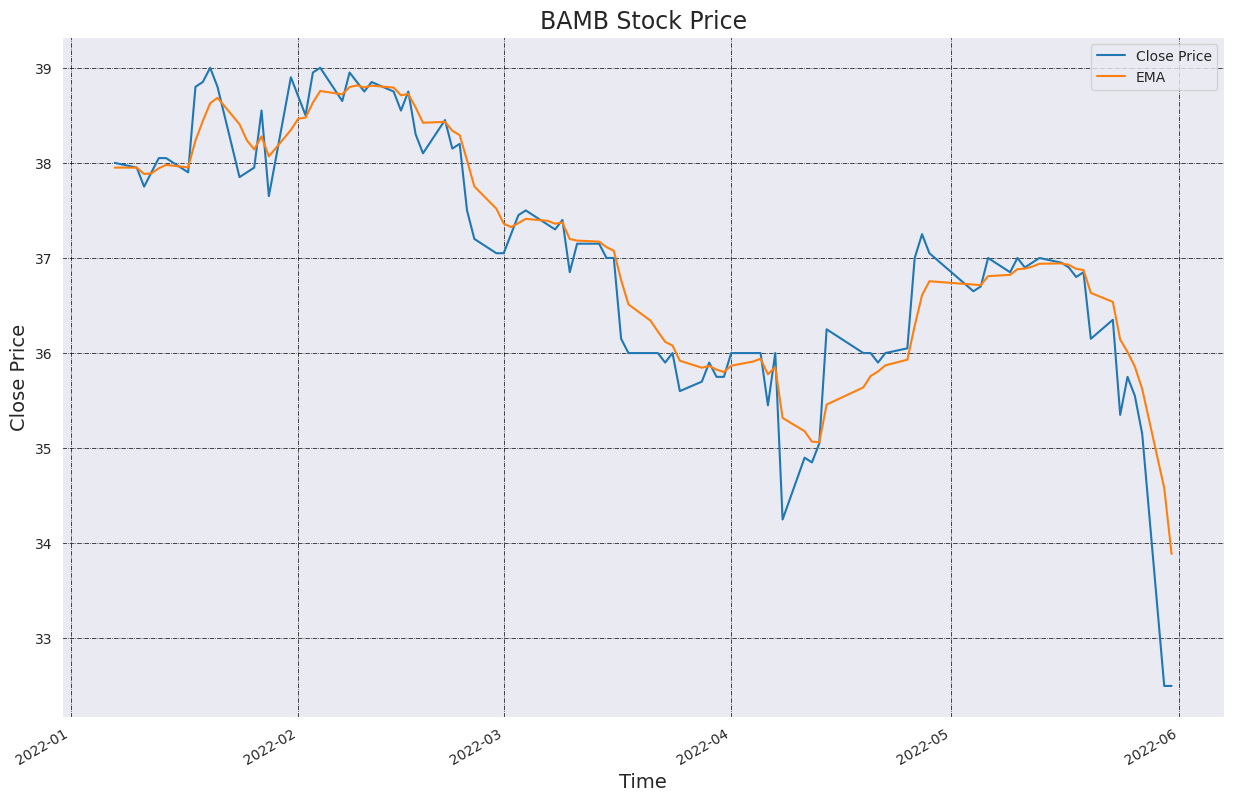

In [948]:
# Visualizations
ema_df[['Close Price', 'EMA']].plot(figsize=(15, 10))
plt.title(company_code + " Stock Price", fontsize=17)
plt.ylabel('Close Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

# Train and Test Split

In [949]:
# Train and Test split
feature = ema_df[['Close Price']]
target = ema_df[['EMA']]

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=.2, random_state=42)

# Model Selection and Training

In [950]:
# Model Selection and Training

# Create the model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Making predictions
y_pred = lin_reg.predict(X_test)

# Validating the model

In [954]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
# 
# # Printout relevant metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R_Squared", r2_score(y_test, y_pred))
print(f'Company Name:{company_df.Name.iloc[0]}')
print(f'Company Code:{company_code}')

Mean Squared Error: 0.07662508464016857
Root Mean Squared Error: 0.27681236359701955
Mean Absolute Error: 0.20295160898804313
R_Squared 0.9261148810821184
Company Name:Bamburi Cement Ltd
Company Code:BAMB


- The R-squared score ranges from 0 to 1, where 1 indicates a perfect prediction, and 0 indicates that the model's predictions are no better than simply predicting the mean of the true values.

In [ ]:
from sklearn.model_selection import KFold


# Validation 2
def rms_error(actual, predicted):
    # lesser values are better (a < b means a is better)
    mse = mean_squared_error(actual, predicted)
    return np.sqrt(mse)


def neg_rmse_score(actual, predicted):
    # greater values are better (a < b means b better)
    return -rms_error(actual, predicted)


def neg_rmse_scorer(mod, ftrs, tgt_actual):
    tgt_pred = mod.predict(ftrs)
    return neg_rmse_score(tgt_actual, tgt_pred)


results = cross_val_score(lin_reg, feature, target, cv=KFold(3, shuffle=True), scoring=neg_rmse_scorer)
#alt scoring = 'r2'
results

##### Cross validation method gives you a better understanding of model performance over the whole dataset instead of just a single train/test split.
##### The process that cross_val_score uses is typical for cross validation and follows these steps:

1. The number of folds is defined, by default this is 5
2. The dataset is split up according to these folds, where each fold has a unique set of testing data
3. A model is trained and tested for each fold
4. Each fold returns a metric for it's test data
5. The mean and standard deviation of these metrics can then be calculated to provide a single metric for the process

- Cross_val_score is used as a simple cross validation technique to prevent over-fitting and promote model generalisation.

# Visualization Prediction vs Actual

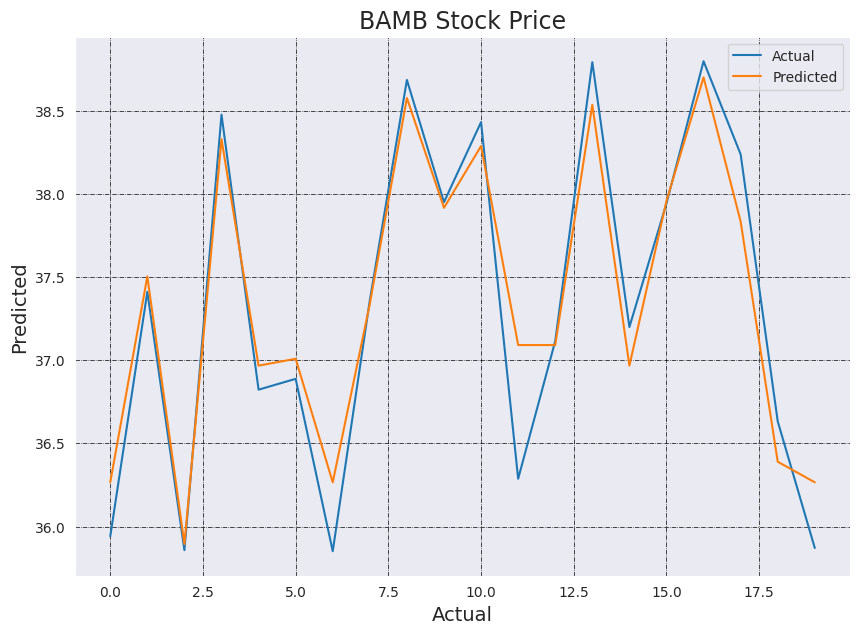

,Actual,Predicted
0,35.940952,36.265730
1,37.410941,37.503378
2,35.857656,35.894436
3,38.475858,38.328477
4,36.822660,36.967064
5,36.887849,37.008319
6,35.851534,36.265730
7,37.360418,37.338358
8,38.684398,38.576006
9,37.950000,37.915927


In [953]:
results = pd.DataFrame({
    "Actual": y_test.EMA.values,
    "Predicted": y_pred.flatten()
})

results[['Actual', 'Predicted']].plot(figsize=(10, 7))
plt.title(company_code + " Stock Price", fontsize=17)
plt.ylabel('Predicted', fontsize=14)
plt.xlabel('Actual', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()
results